#1- Introduction to this trial of Step-3 Pipeline

* Ensemble models are a way of combining multiple machine learning models to get better results than any individual model could achieve. To do this, the models are trained on the same data and their predictions are combined in some way to produce a final prediction. This can be done in a variety of ways, such as taking the average of the predictions or voting on the most popular prediction.

* Some examples of ensemble models we have tried in Step 2

    - Random forest: Consists of a large number of decision trees. Each decision tree is trained on a different subset of the training data, and the final prediction is made by aggregating the predictions of the individual trees.
    - AdaBoost: AdaBoost trains a sequence of models, each of which is designed to correct the errors of the previous model.
    - Gradient boosting (XGBoost): Gradient boosting trains a sequence of models, each of which is designed to minimize the gradient of the loss function.

* Ensemble models can be used to improve the performance of machine learning models in a variety of ways. For example, they can be used to reduce overfitting, improve accuracy, and make more robust predictions. However, like all traditional machine learning algorithms, these models are optimized for overall accuracy, which means that they may not be the best choice for tasks where it is important to prioritize other metrics, such as precision or recall as un case of class imbalance and in which cases we need to handle class imbalance issue manually by using techniques such as SMOTE, Over Sampling, Under Sampling, ... etc.

* However we found that there are some ensemble models that are designed specificaly to handle the imbalanced datasets automatically without the need for any additional data resampling techniques. These ensemble models can be found at "imblearn" library.
Below we list some of these models that we will try to assess in this notebook.
    - Bagging Algorithms
        - BalancedBaggingClassifier:  A Bagging classifier with additional balancing step to balance the training set at fit time.
        - BalancedRandomForestClassifier: A balanced random forest randomly under-samples each bootstrap sample to balance it.
    - Boosting Algorithms
        - RUSBoostClassifier: Randomly under-sample the dataset before performing a boosting iteration
        - EasyEnsembleClassifier: The classifier is an ensemble of AdaBoost learners trained on different balanced bootstrap samples. The balancing is achieved by random under-sampling.
* More about these algorithms can be found at [imbalanced-learn user guide](https://imbalanced-learn.org/stable/ensemble.html#bagging)






For fair comparison with Step 2 models we'll carry out the same preprocessing done at Step 2 pipeline.

# 3- Loading the Classes

In [1]:
import sys
sys.path.append('..')

from my_package.data_cleaning import *
from my_package.modeling import *
from my_package.preprocessing import *
from my_package.nn_modeling import *

# 4- Reading the data and performing general data cleaning

* Duplicate Values Checking
* Null Values Checking
* Outliers Checking

Create an instance of the "data cleaning" class to be able to perfrom verious defined functions.

Basic functionality done automatically by instatiating the "data_cleaning" class includes:

* Dropping "device_fraud_count" feature
* Adjusting the datatype of some features to be categorical


In [2]:
df=data_cleaning('Base.csv')

In [4]:
df.data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,24,0,500.0,0,INTERNET,3.888115,windows,0,1,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,-1,0,200.0,0,INTERNET,4.728705,other,0,1,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,31,1,200.0,0,INTERNET,2.047904,linux,0,1,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,7


Checking if there are any duplicates

In [5]:
df.check_duplicates()

'this data has no duplicates'

Checking data statistics

In [6]:
df.describe(flag='numerical')

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,month
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.493694,16.718568,86.587867,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,10.839303,515.851010,7.544940,3.288674
std,0.289125,44.046230,88.406599,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,12.116875,487.559902,8.033106,2.209994
min,0.000001,-1.000000,-1.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,-1.000000,190.000000,-1.000000,0.000000
1%,0.021672,-1.000000,0.000000,2.825563e-04,-1.831266,248.000000,695.593750,2021.407710,3059.832982,0.000000,1.000000,-14.000000,-1.000000,200.000000,0.651256,0.000000
25%,0.225216,-1.000000,19.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,-1.000000,200.000000,3.103053,1.000000
50%,0.492153,-1.000000,52.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,5.000000,200.000000,5.114321,3.000000
75%,0.755567,12.000000,130.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,25.000000,500.000000,8.866131,5.000000
99%,0.997470,231.000000,370.000000,2.199567e+01,100.826524,4970.000000,13932.187847,8597.047788,6779.328391,1974.000000,23.000000,305.000000,31.000000,1500.000000,44.552828,7.000000
max,0.999999,383.000000,428.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,32.000000,2100.000000,85.899143,7.000000


In [7]:
df.describe(flag='categorical')

,fraud_bool,income,customer_age,payment_type,employment_status,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,source,device_os,keep_alive_session,device_distinct_emails_8w
count,1000000,1000000.0,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,2,9.0,9,5,7,2,7,2,2,2,2,2,5,2,4
top,0,0.9,30,AB,CA,1,BC,0,1,0,0,INTERNET,other,1,1
freq,988971,221419.0,311433,370554,730252,529886,372143,582923,889676,777012,974758,992952,342728,576947,968067


In [8]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   fraud_bool                        1000000 non-null  category
 1   income                            1000000 non-null  category
 2   name_email_similarity             1000000 non-null  float64 
 3   prev_address_months_count         1000000 non-null  int64   
 4   current_address_months_count      1000000 non-null  int64   
 5   customer_age                      1000000 non-null  category
 6   days_since_request                1000000 non-null  float64 
 7   intended_balcon_amount            1000000 non-null  float64 
 8   payment_type                      1000000 non-null  object  
 9   zip_count_4w                      1000000 non-null  int64   
 10  velocity_6h                       1000000 non-null  float64 
 11  velocity_24h             

## Checking the nulls

Since the null values in the dataset are -1 they were not shown by using df.info() method so we will check them using our defined method of the preprocessing class

In [9]:
columns_with_nulls=df.get_columns_with_possibe_missing_values()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


Replace the -1 value with an actual Null and return the null counts

In [10]:
df.put_nulls()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

<AxesSubplot: >

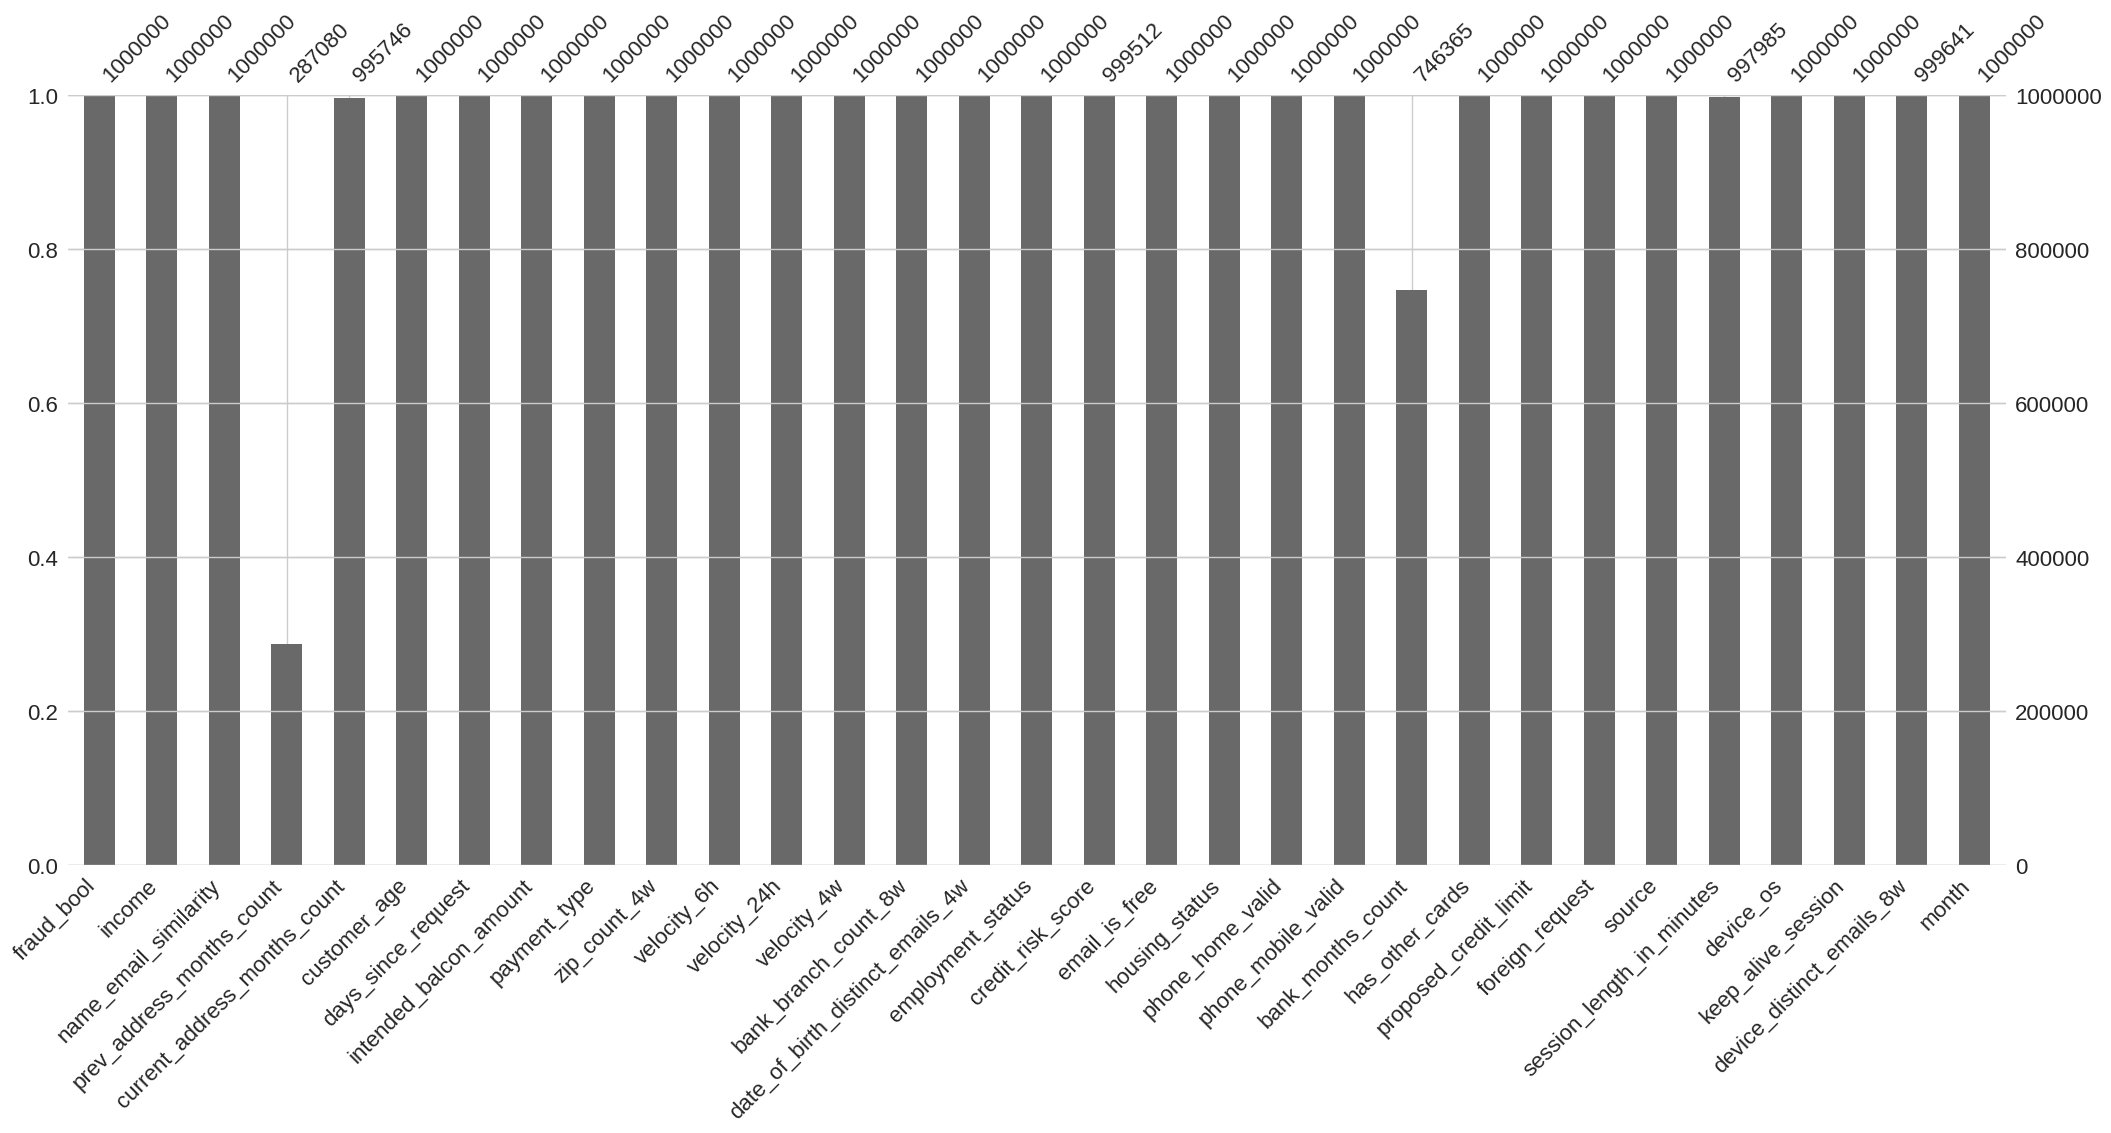

In [11]:
msno.bar(df.data)

<AxesSubplot: >

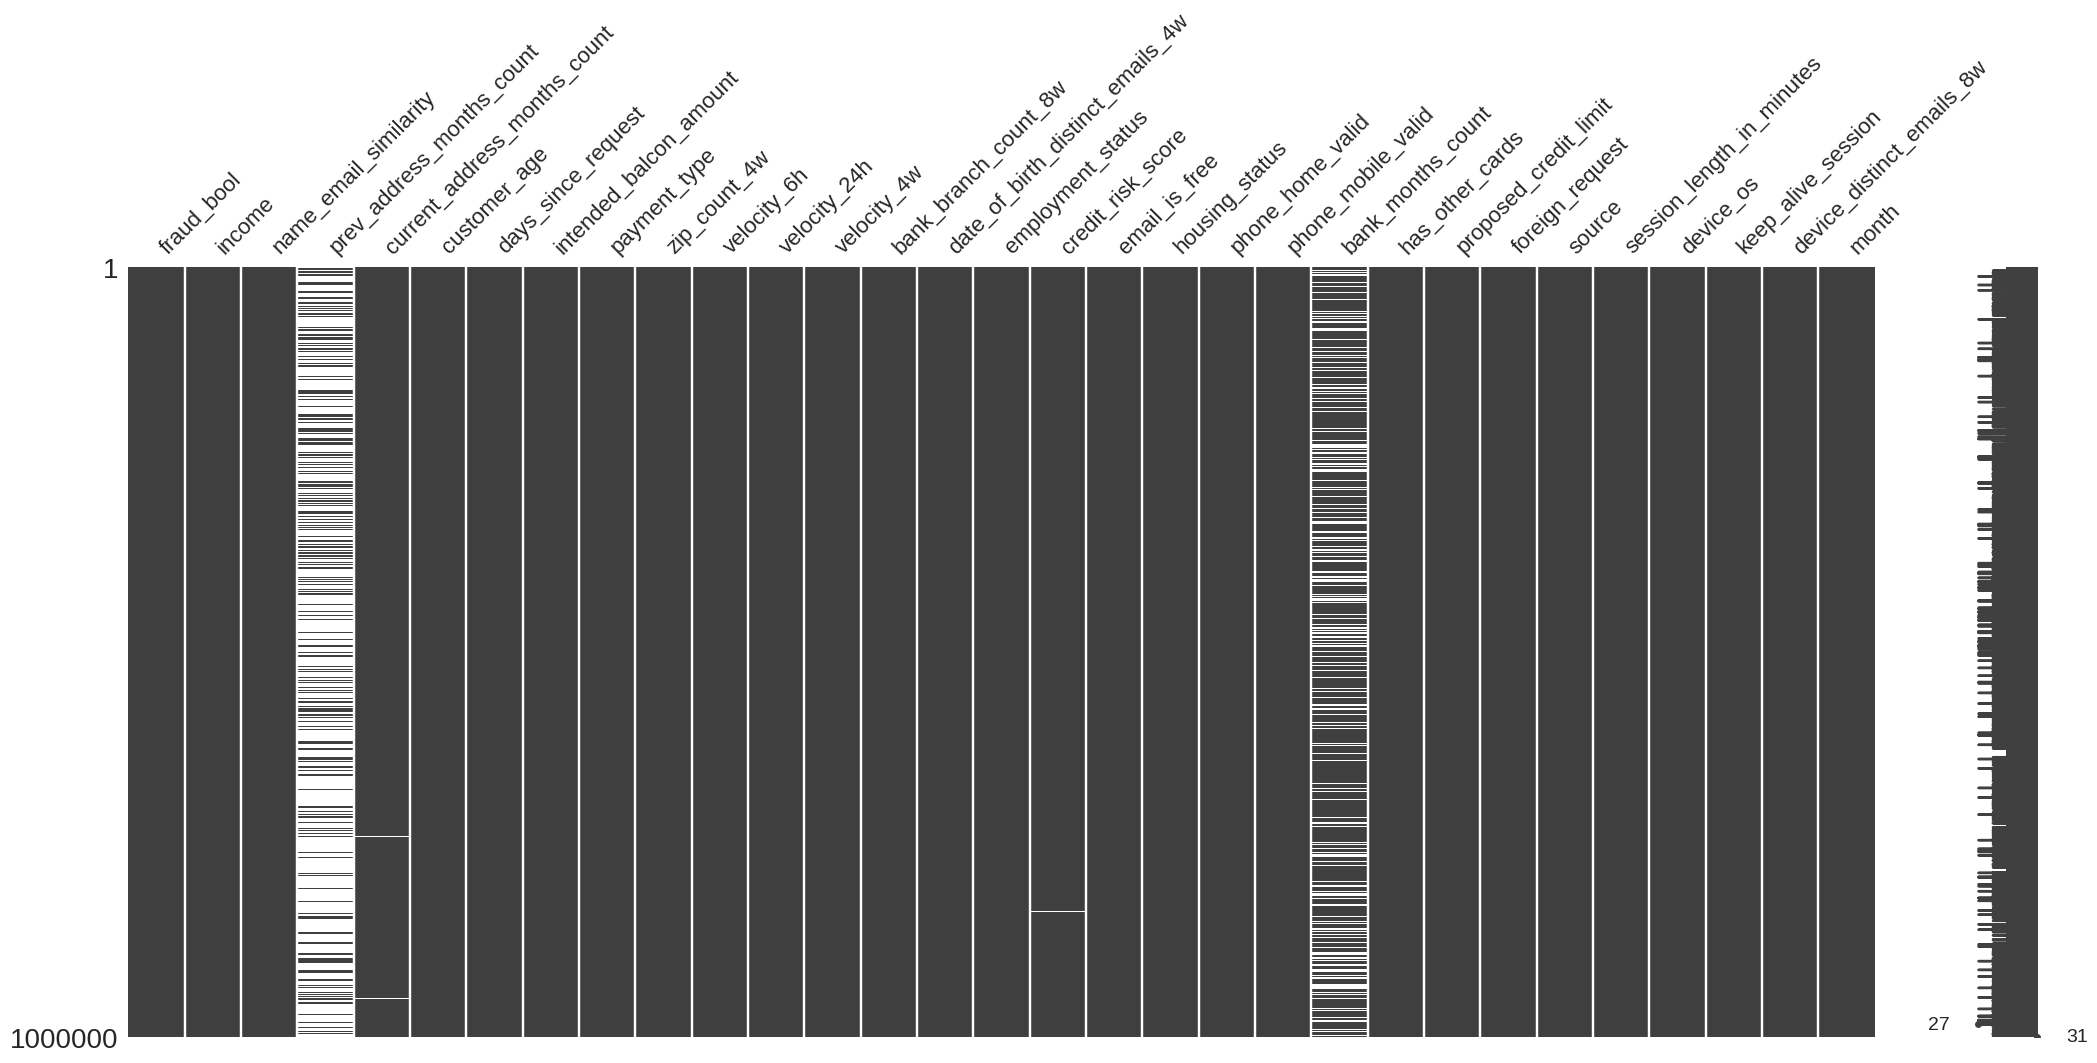

In [12]:
msno.matrix(df.data)

### Handling the nulls:


Since the below features have alot of missing values trying to impute them can bias the results so for this current trial we'll drop both of the columns
* prev_address_months_count
* bank_months_count

For other columns that have missing values we'll impute them.

In [13]:
df.delete_columns(['prev_address_months_count',
                   'bank_months_count'])

'Columns prev_address_months_count, bank_months_count deleted successfully.'

Missing values imputation for the rest of features
* Null values of numerical features are replaced by their mean
* Null values of the categorical features are replace by the most repeated value

In [14]:
df.data['current_address_months_count'].fillna(df.data.current_address_months_count.mean(),inplace=True)
df.data['credit_risk_score'].fillna(df.data.credit_risk_score.mean(),inplace=True)
df.data['session_length_in_minutes'].fillna(df.data.session_length_in_minutes.mean(),inplace=True)
df.data['device_distinct_emails_8w'].fillna(df.data.device_distinct_emails_8w.mode()[0],inplace=True)

## Checking Multicollinearity:
 - Correlation matrix

We can check for highly correlated features (~0.80) and try to drop them to handle the multicolinearity if exists but from below correlation matrcies of both numerical and categorical features there is no correlation above the threshold so we will not drop any features.

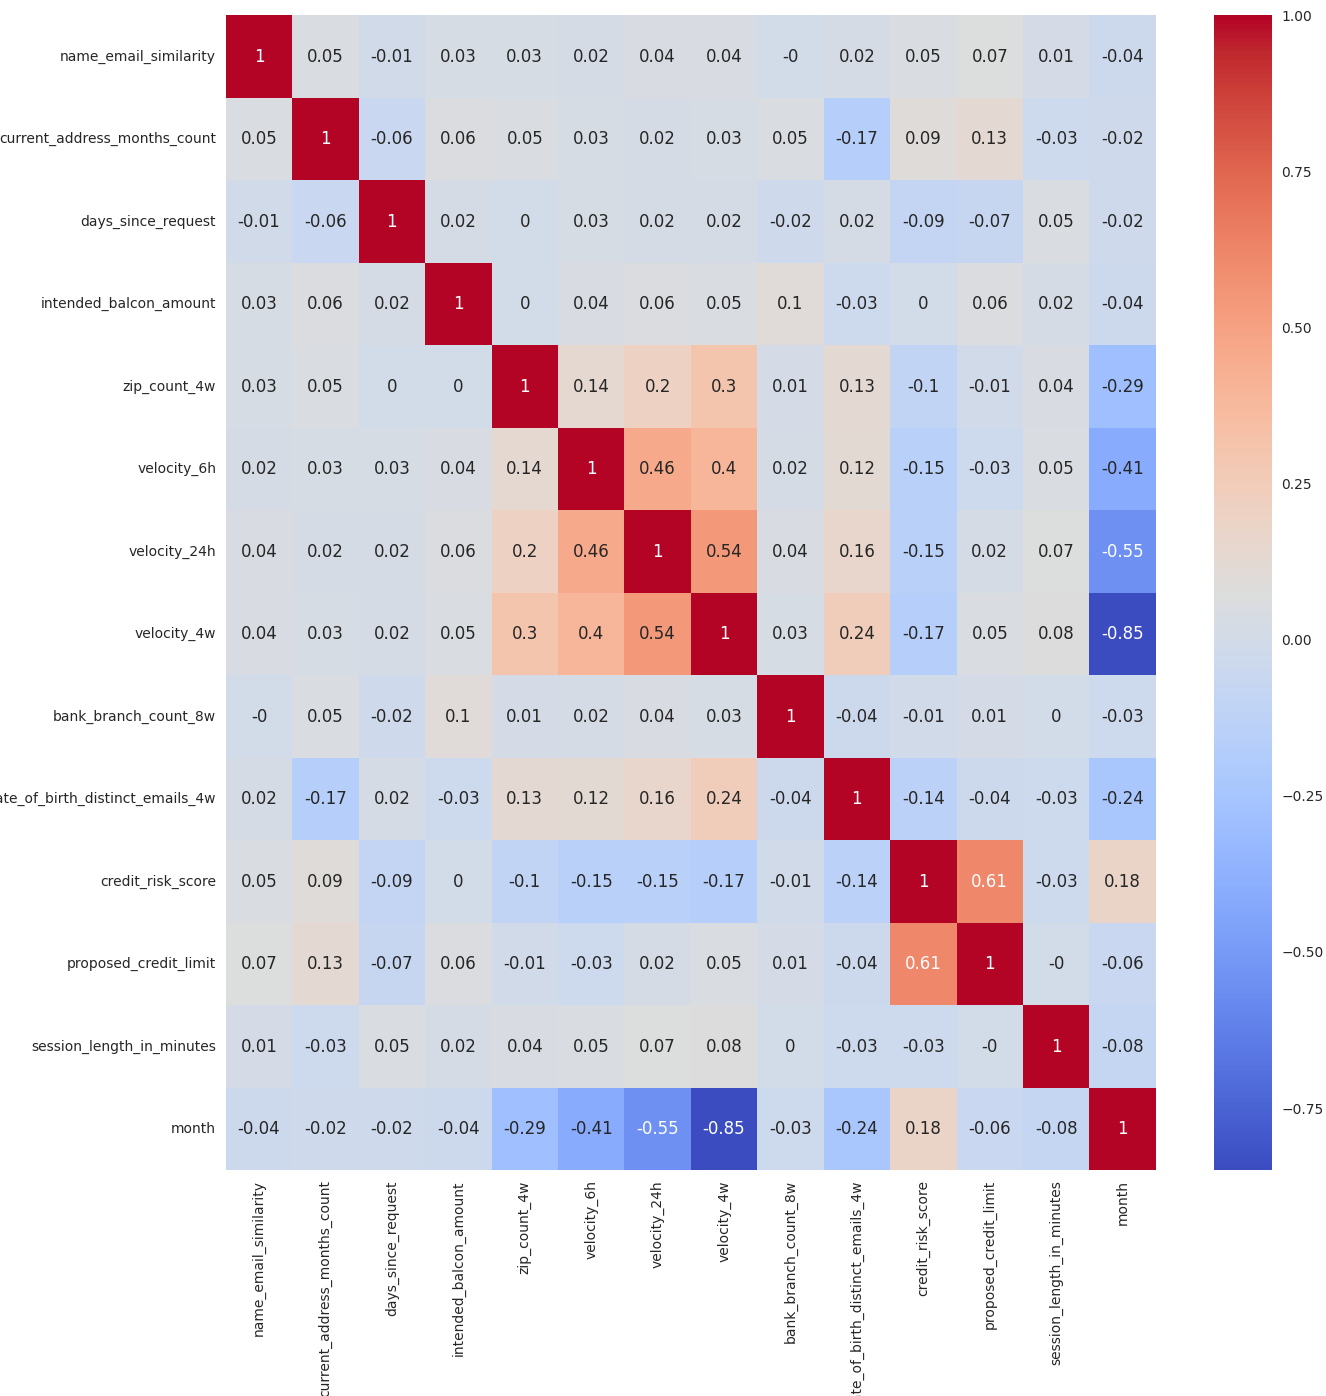

In [15]:
df.plot_corr_heatmap()

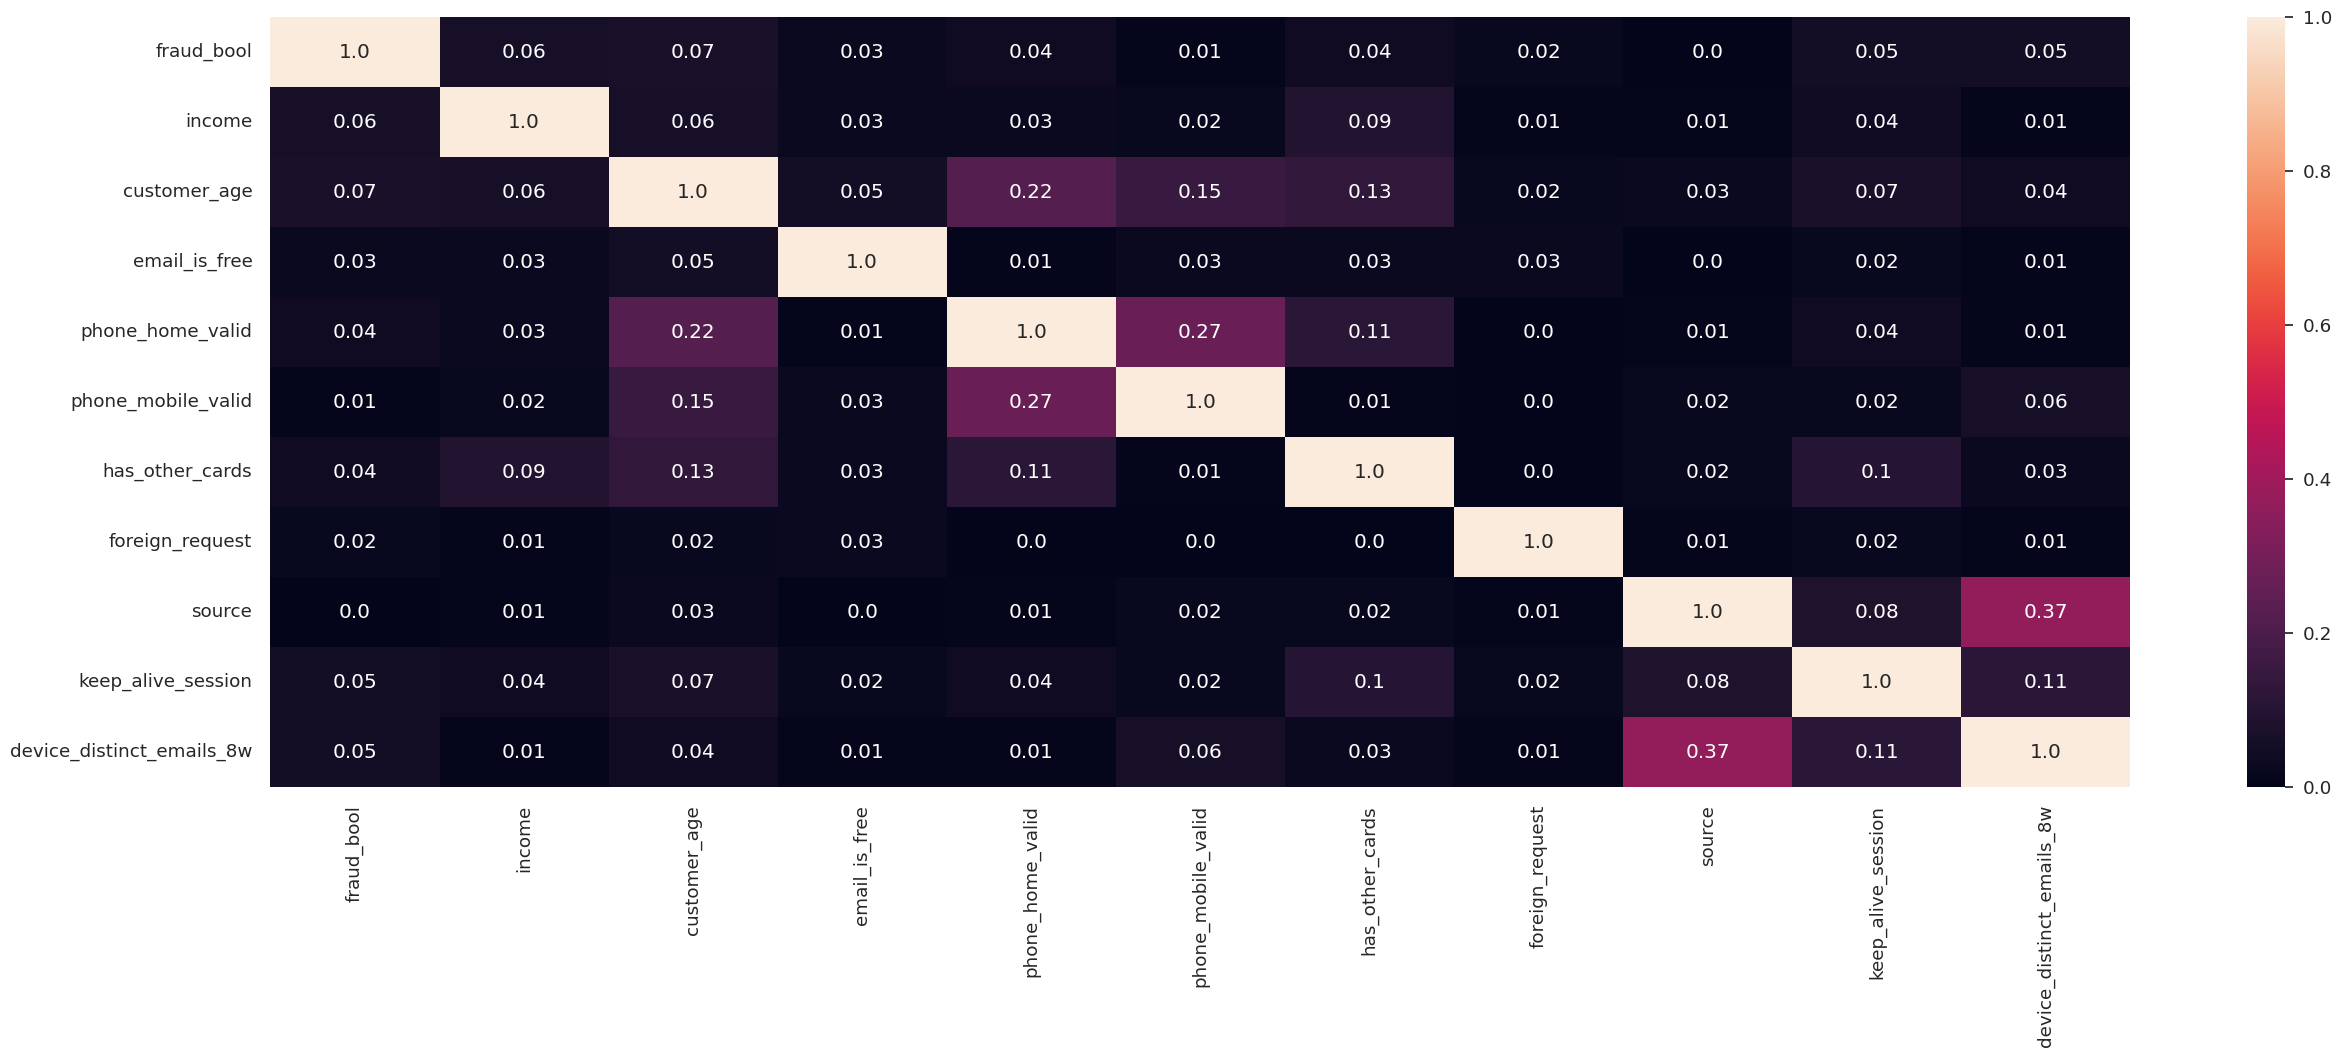

In [16]:
df.plot_cramer()

## Checking the Outliers

Check the skewness for the numerical values, any skewness value above 1 means that the feature is not normally distributed and therefore there is a possibility for outliers

velocity_4w                        -0.060125
name_email_similarity               0.042839
month                               0.112396
credit_risk_score                   0.297223
velocity_24h                        0.331134
velocity_6h                         0.562682
date_of_birth_distinct_emails_4w    0.703250
proposed_credit_limit               1.301410
current_address_months_count        1.387206
zip_count_4w                        1.456657
intended_balcon_amount              2.507173
bank_branch_count_8w                2.747161
session_length_in_minutes           3.311915
days_since_request                  9.278955
dtype: float64


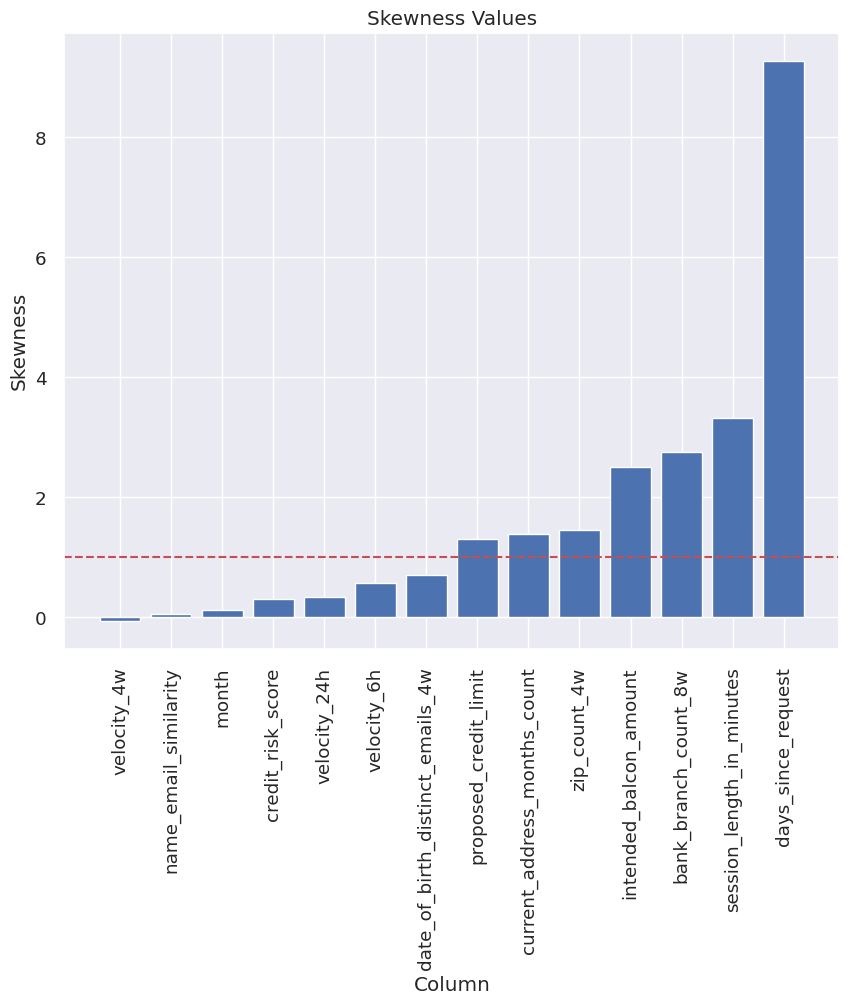

In [17]:
# printing the skewness sorted and plotting a bar chart
# and skewed features exceeding the threshold of 1 will be returned
skewed_columns=df.draw_skewness_barchart()

### Handle the outliers:

Applying the log transform of skewed features exceeding threshold of 1

In [18]:
for column in skewed_columns:
    if column =='intended_balcon_amount': # skip it for now
        continue
    print(df.apply_log_transform(column))

Log transform applied to column 'current_address_months_count' successfully.
Log transform applied to column 'days_since_request' successfully.
Log transform applied to column 'zip_count_4w' successfully.
Log transform applied to column 'bank_branch_count_8w' successfully.
Log transform applied to column 'proposed_credit_limit' successfully.
Log transform applied to column 'session_length_in_minutes' successfully.


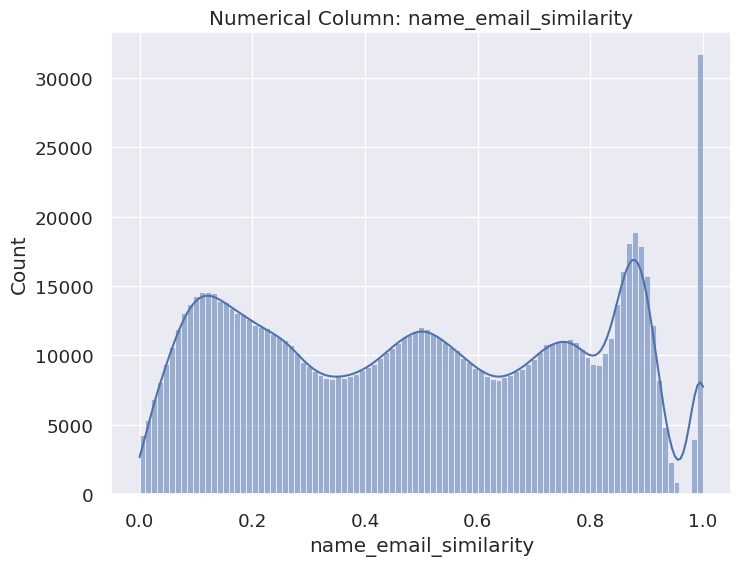

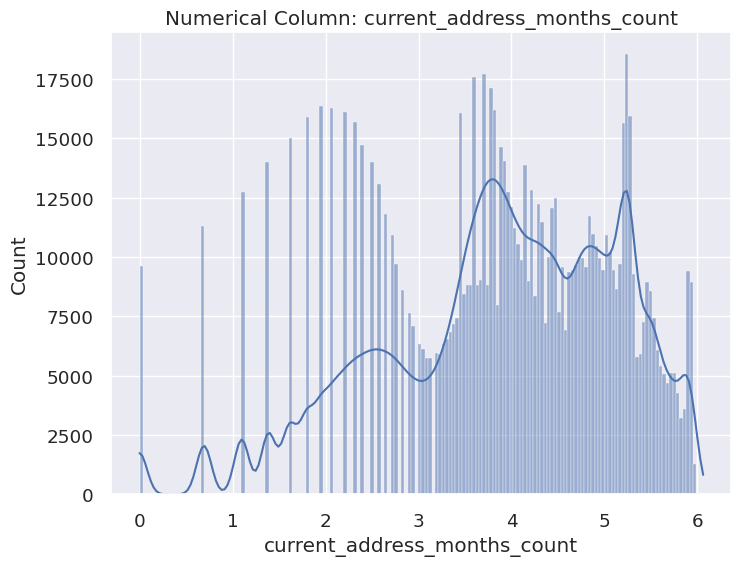

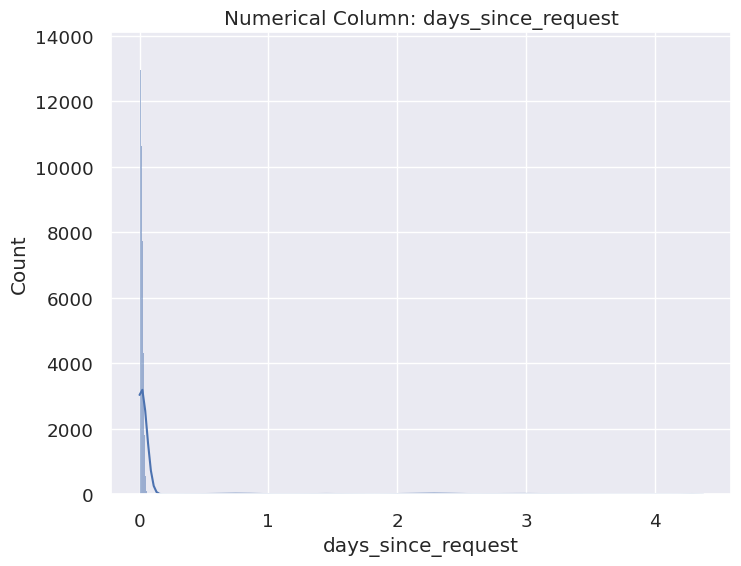

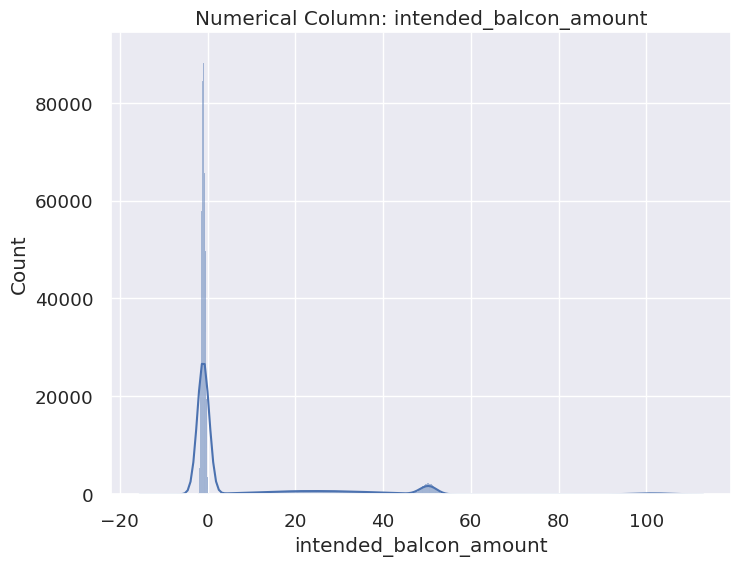

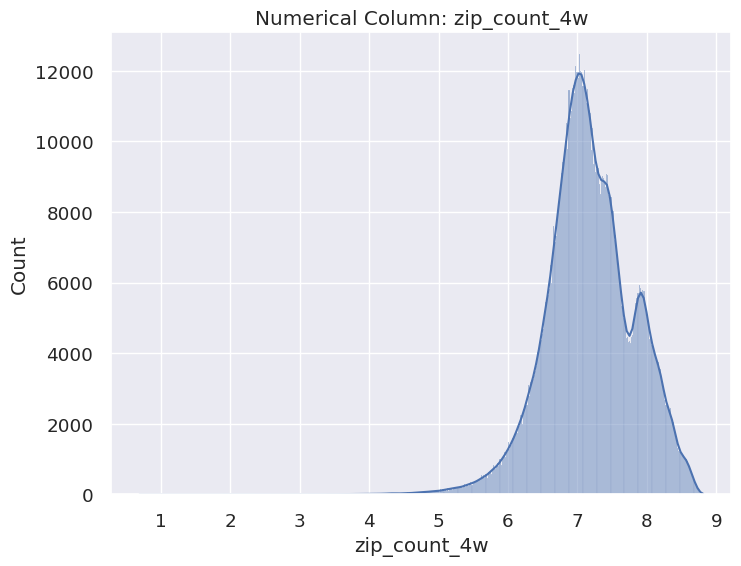

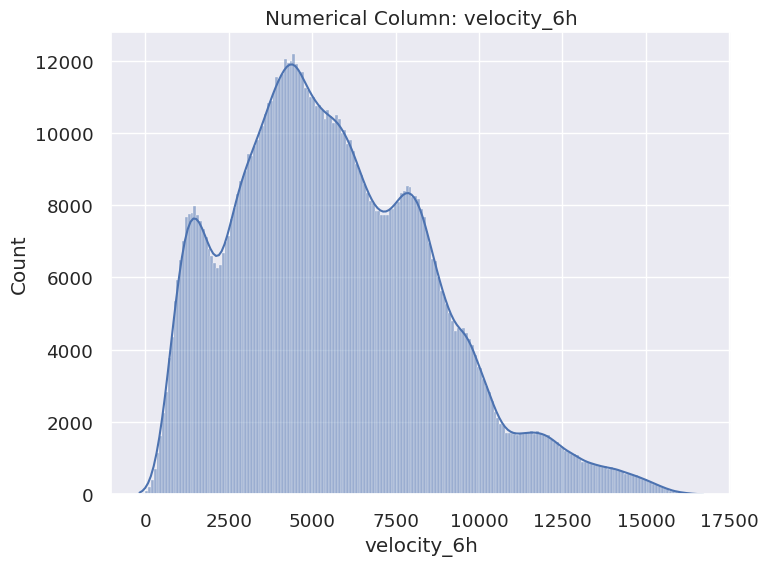

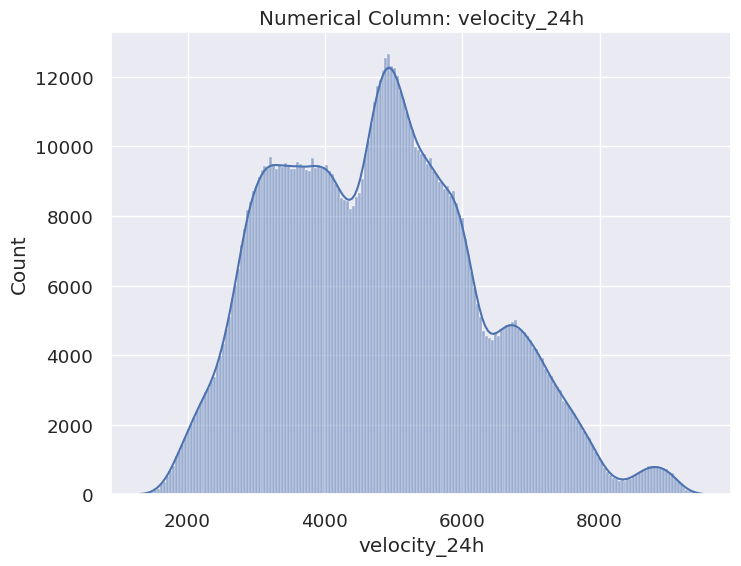

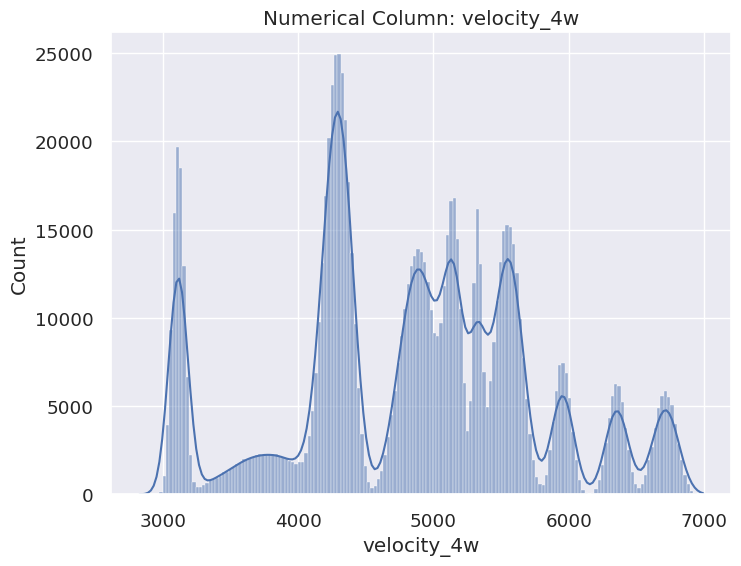

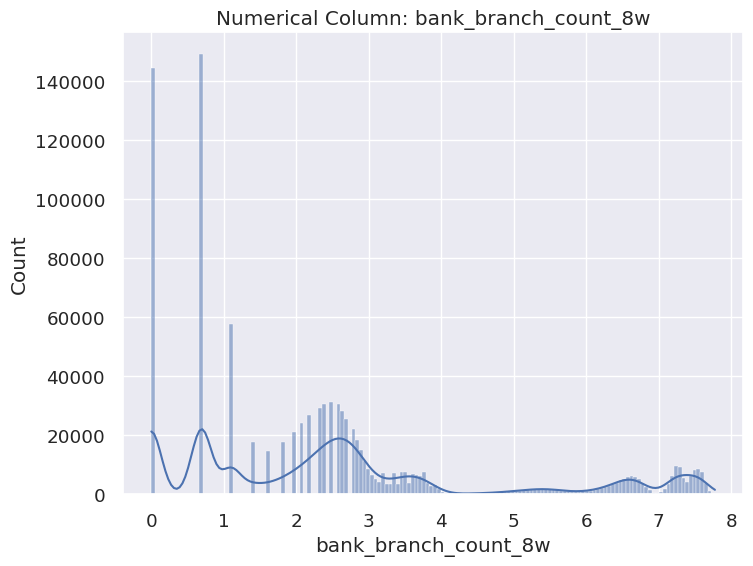

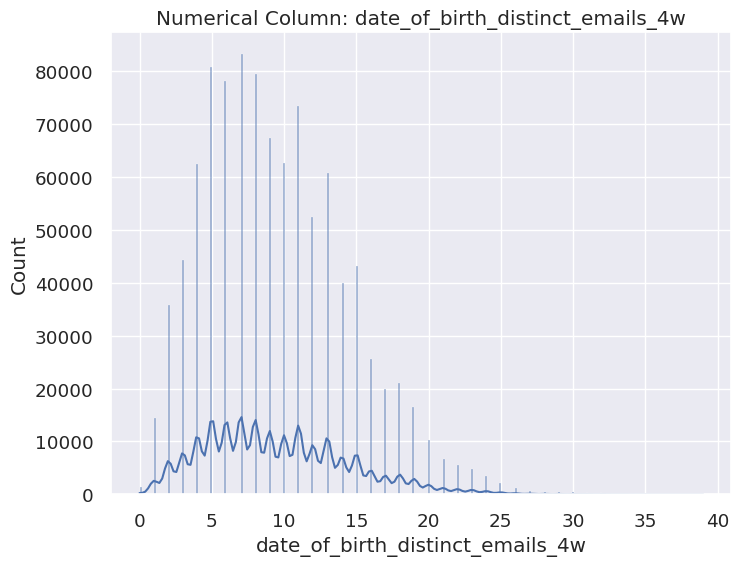

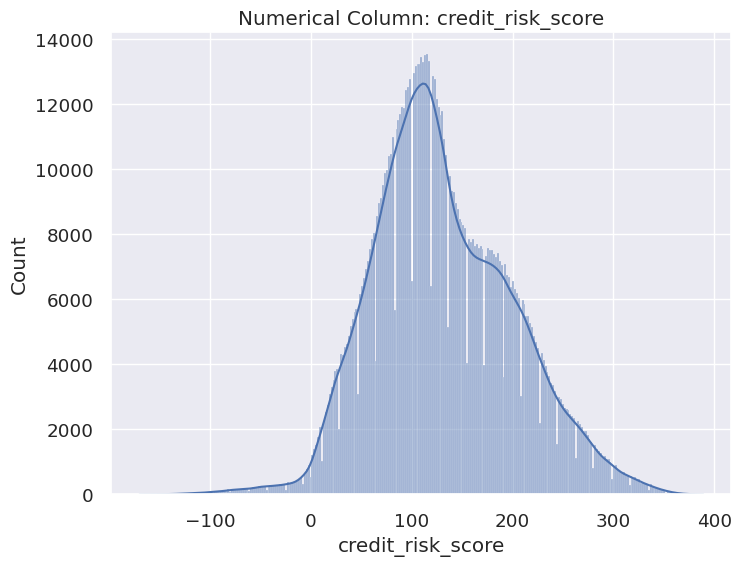

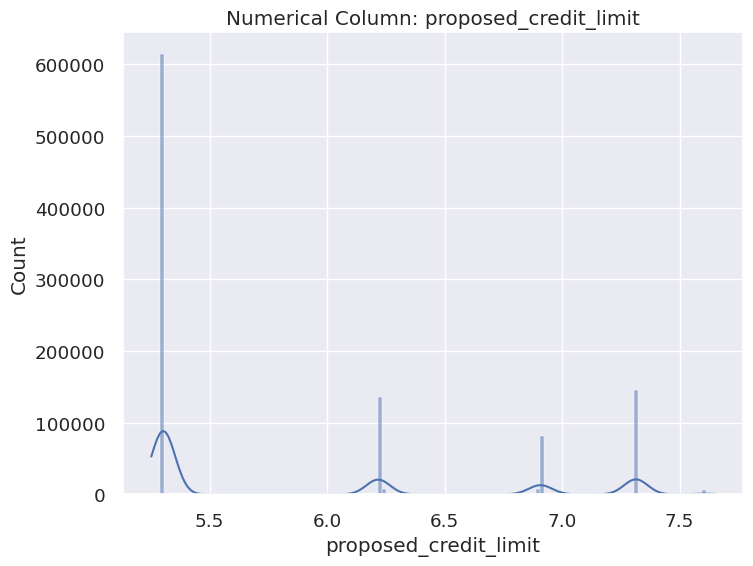

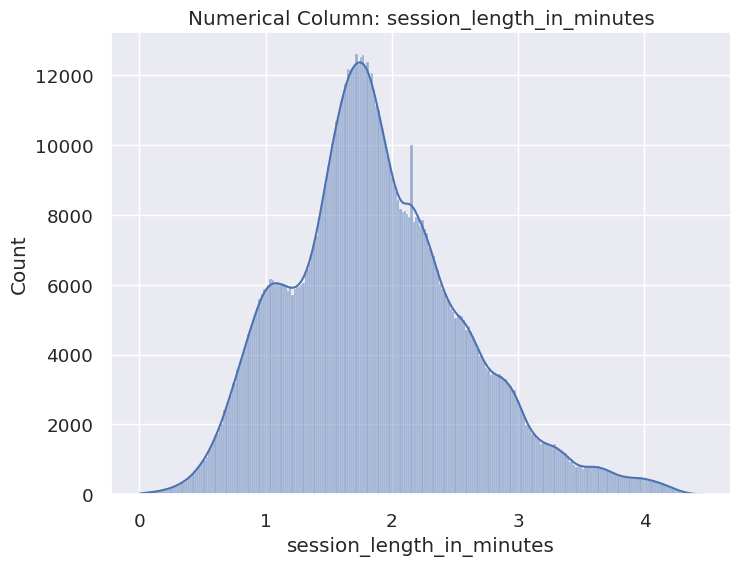

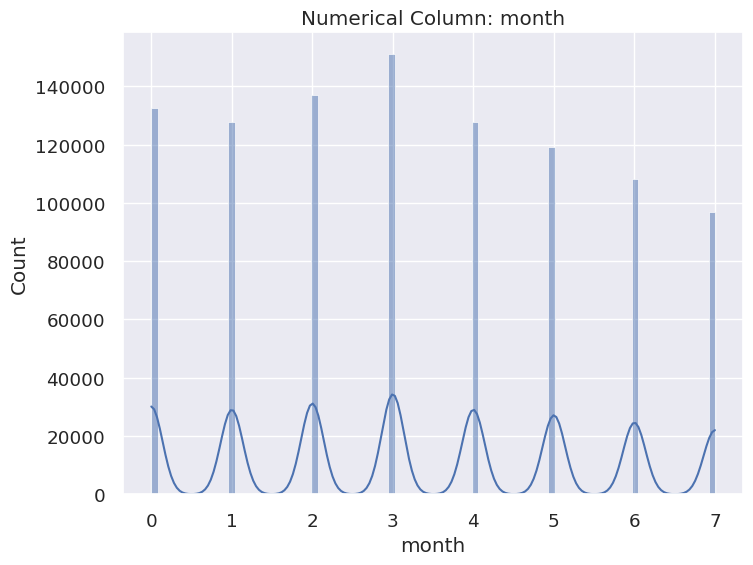

In [19]:
df.plot_numerical_columns()

In [20]:
#df.plot_categorical_columns()
#df.describe(flag='numerical')

In [21]:
# get columns containing the outliers
# for normaly distributed features outliers will be identified using z-score
# for features that are not normally distributed will use the percentiles to determine them
column_with_outliers=df.find_numerical_columns_with_possible_outliers()

<AxesSubplot: title={'center': 'Target Label Distribution Before Handling Outliers'}>

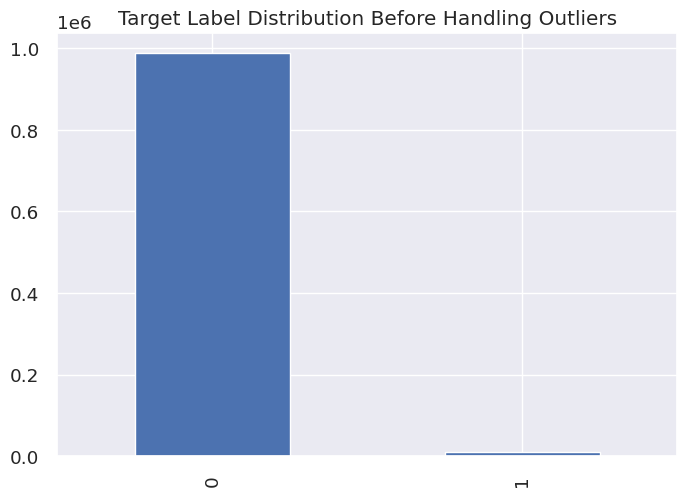

In [22]:
# Check the Target Label Distribution Before Handling Outliers
df.data['fraud_bool'].value_counts().plot(kind='bar', title='Target Label Distribution Before Handling Outliers')

In [23]:
# removing the outliers from the dataset
df.handle_outliers(column_with_outliers, method='delete')

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,phone_mobile_valid,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,4.488636,50,0.020709,-1.331345,AA,6.646391,10650.765523,...,0,0,6.216606,0,INTERNET,1.586807,windows,0,1,7
5,1,0.3,0.143921,3.433987,30,0.027839,-0.748282,AD,6.597146,3223.248406,...,1,0,5.303305,0,INTERNET,1.760453,windows,0,1,7
6,1,0.7,0.321554,5.030438,30,0.030219,-0.278994,AB,6.776507,5515.771548,...,1,0,7.313887,0,INTERNET,0.939608,windows,1,1,7
7,1,0.9,0.064817,2.944439,50,0.033973,-1.265721,AB,6.804615,4736.214496,...,0,0,5.303305,1,INTERNET,1.291289,linux,0,1,7
9,1,0.9,0.700096,4.110874,40,0.016670,-1.070271,AB,7.070724,4504.470396,...,1,0,5.303305,0,INTERNET,3.220504,windows,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,0,0.3,0.251473,4.204693,30,0.010937,-0.399646,AB,6.785588,2821.429662,...,1,0,5.303305,0,INTERNET,1.374352,windows,1,1,4
999991,0,0.5,0.069609,4.025352,40,0.020490,-2.043942,AB,7.016610,7428.116057,...,0,0,5.303305,0,INTERNET,1.450348,other,0,1,4
999992,0,0.1,0.904650,0.693147,10,0.018360,-1.153810,AD,8.259717,3303.719717,...,1,0,5.303305,0,INTERNET,2.996060,linux,0,1,4
999994,0,0.1,0.516887,3.465736,20,0.027508,-1.031909,AD,8.006701,3928.840047,...,1,0,5.303305,0,INTERNET,0.995502,other,1,1,4


<AxesSubplot: title={'center': 'Target Label Distribution After Handling Outliers'}>

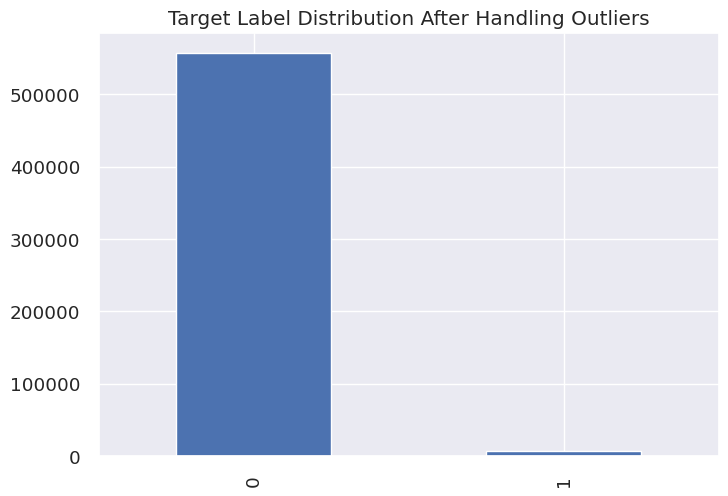

In [24]:
# Check the Target Label Distribution After Handling Outliers
df.data['fraud_bool'].value_counts().plot(kind='bar', title='Target Label Distribution After Handling Outliers')

# 5- Data Splitting

Here we'll define a function to split data into training and testing with possible different criteria

In [25]:
def split_data(df,criteria='random'):
    X = df.drop(['fraud_bool'], axis=1)
    y = df['fraud_bool']
    if criteria=='paper':

        # Train test split by 'month', month 0-5 are train, 6-7 are test data as proposed in the paper
        X_train = X[X['month']<6]
        X_test = X[X['month']>=6]
        y_train = y[X['month']<6]
        y_test = y[X['month']>=6]


    elif criteria=='random':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    elif criteria=='stratify':

        X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)

    X_train.drop('month', axis=1, inplace=True)
    X_test.drop('month', axis=1, inplace=True)
    return X_train, X_test, y_train, y_test

In [26]:
data=df.get_data()

We'll split data based on the "month" column, months 0-5 are for training , 6-7 are for testing

In [27]:
# split the data
X_train, X_test, y_train, y_test=split_data(data,criteria= 'paper')

Getting the groups:

In [28]:
train_groups=(X_train["customer_age"] > 50).map({True: ">50", False: "<=50"})
test_groups=(X_test["customer_age"] > 50).map({True: ">50", False: "<=50"})

# 6- Data Preprocessing

In [29]:
data = preprocessing(X_train, y_train)


## Scaling numerical features using "Standard Scaler"

In [30]:
scalers = {}
for column in X_train.select_dtypes(include=['int','float']):
    m,scaler=data.scale_data('standard',column)
    scalers[column] = scaler

Apply numerical features transform on test data

In [31]:
# apply the same scaling on the testset
for column in X_test.select_dtypes(include=['int','float']):
    X_test[column] = scalers[column].transform(X_test[[column]])

## Encoding the categorical features using "One-hot-Encoder"

In [32]:
encoders = {}
for column in X_train.select_dtypes(include=['category','object']):
    _, encoder = data.encode_categorical_features(column , encoding_type= 'one-hot')
    encoders[column] = encoder

Transform the test data

In [33]:
# apply the encoding on the testset
for column in X_test.select_dtypes(include=['object','category']).columns:
    ohe=encoders[column]
    encoded_col = pd.DataFrame(ohe.transform(X_test[column].values.reshape(-1, 1)).toarray(),index=X_test.index)
    encoded_col.columns = [column + '_' + str(val) for val in ohe.categories_[0]]
    X_test = pd.concat([X_test, encoded_col], axis=1)
    X_test.drop(columns=column, inplace=True,axis=1)

In [34]:
# arrange the column names according to the concat data
X_test=X_test[data.concat_data().columns]

In [35]:
X_train,y_train=data.get_data()

# 7- Modeling : Training and Evaluation

In [36]:
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups)

## BalancedBaggingClassifier:

This implementation of Bagging is similar to the scikit-learn implementation but it includes an additional step to balance the training set at fit time using a given sampler. By default, a RandomUnderSampler is used.

In [75]:
from imblearn.ensemble import BalancedBaggingClassifier

# empty hyperparameters grid (needed due to the way the modeling class was built)
param_grid = {
}

# bagging of Logistic regression models
balanced_bagging_model = BalancedBaggingClassifier(
                        estimator=LogisticRegression(random_state=42), # The base estimator to fit on random subsets of the dataset
                        n_estimators=200, # The number of base estimators in the ensemble.
                        max_samples=1.0,  # The number of samples to draw from X to train each base estimator (percentage)
                        max_features=1.0,  # The number of features to draw from X to train each base estimator
                        bootstrap=True, # Whether samples are drawn with replacement
                        bootstrap_features=True, # Whether features are drawn with replacement.
                        sampling_strategy='auto', # Sampling information to sample the data set. 'auto': equivalent to 'not minority'.
                        random_state=42,)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: BalancedBaggingClassifier(bootstrap_features=True,
                          estimator=LogisticRegression(random_state=42),
                          n_estimators=200, random_state=42)
Best score: 0.8827563591725917
AUC: 0.8777382372996105
TPR:  49.419999999999995% 
FPR:  4.99% 
Threshold:  0.75
Predictive Equality:  95.37%


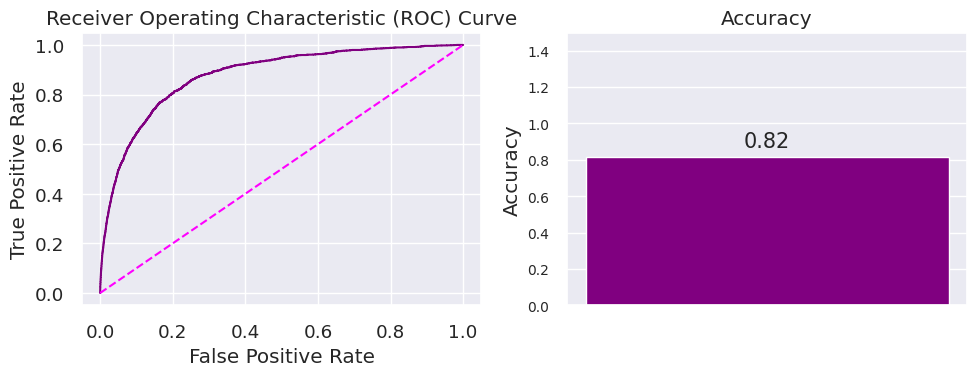

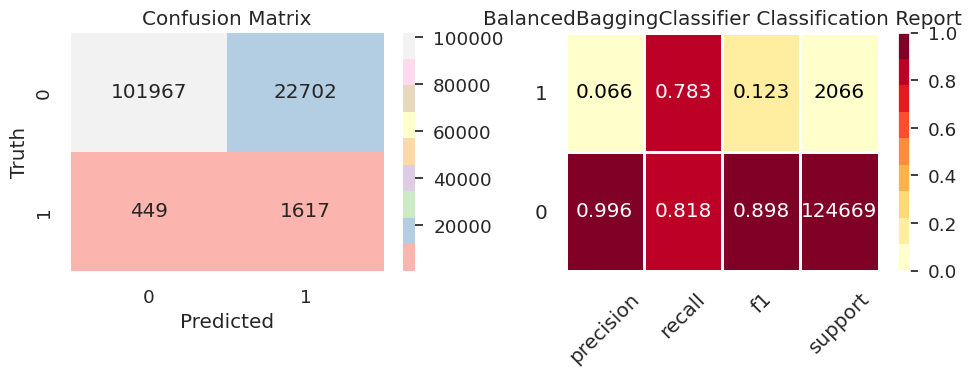

CPU times: user 6min 37s, sys: 1min 38s, total: 8min 15s
Wall time: 11min 11s


In [76]:
%%time
experiment.train(balanced_bagging_model,param_grid=param_grid,search_type='random')

In [77]:
saved_model_path = experiment.save_model('step_3_BalancedBaggingClassifier.pkl')
print("Model saved at:", saved_model_path)

Model saved at: step_3_BalancedBaggingClassifier.pkl


## BalancedRandomForestClassifier:

BalancedRandomForestClassifier is another ensemble method in which each tree of the forest will be provided a balanced bootstrap sample while providing all functionality of the RandomForestClassifier.

A balanced random forest randomly under-samples each bootstrap sample to balance it.

In [78]:
from imblearn.ensemble import BalancedRandomForestClassifier

# empty hyperparameters grid (needed due to the way the modeling class was built)
param_grid = {
}

# balanced random forests (bagging)
balanced_RF_model = BalancedRandomForestClassifier(n_estimators=200, # The number of trees in the forest.
                                        criterion='gini', # The function to measure the quality of a split.
                                        max_depth=3, # The maximum depth of the tree
                                        sampling_strategy='auto', # Sampling information to sample the data set. 'auto': equivalent to 'not minority'.
                                        replacement=True, # Whether or not to sample randomly with replacement or not.
                                        class_weight="balanced_subsample", # Weights associated with classes, "balanced_subsample": weights are computed based on the bootstrap sample for every tree grown
                                        bootstrap=True, # Whether bootstrap samples are used when building trees
                                        random_state=42)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: BalancedRandomForestClassifier(class_weight='balanced_subsample', max_depth=3,
                               n_estimators=200, random_state=42,
                               replacement=True)
Best score: 0.8577301398654638
AUC: 0.8541940762915611
TPR:  41.29% 
FPR:  4.99% 
Threshold:  0.63
Predictive Equality:  100.0%


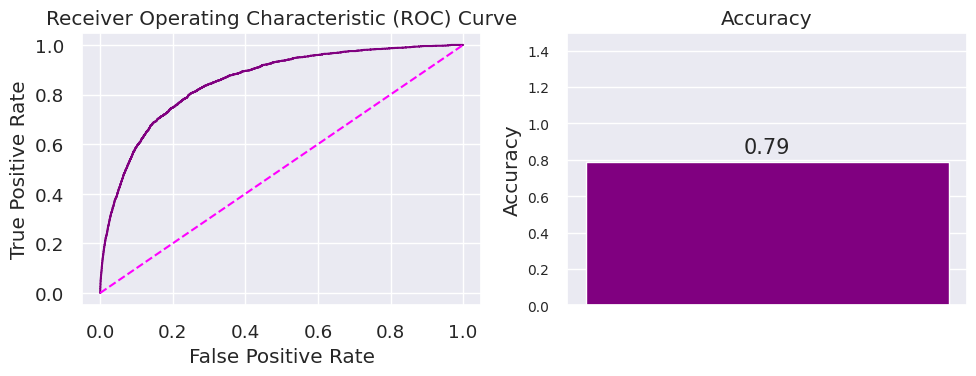

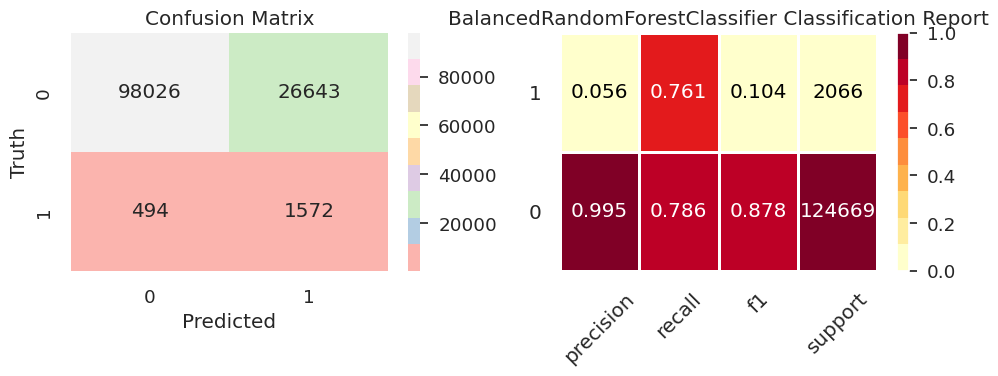

CPU times: user 45 s, sys: 1.11 s, total: 46.1 s
Wall time: 1min 16s


In [79]:
%%time
experiment.train(balanced_RF_model,param_grid=param_grid,search_type='random')

In [80]:
saved_model_path = experiment.save_model('step_3_BalancedRandomForestClassifier.pkl')
print("Model saved at:", saved_model_path)

Model saved at: step_3_BalancedRandomForestClassifier.pkl


## RUSBoostClassifier:

RUSBoostClassifier randomly under-sample the dataset before performing a boosting iteration.

In [81]:
from imblearn.ensemble import RUSBoostClassifier

# empty hyperparameters grid (needed due to the way the modeling class was built)
param_grid = {
}

# boosting and undersampling
rusboost_model = RUSBoostClassifier(
                    estimator=None, # The base estimator from which the boosted ensemble is built. If None, then the base estimator is DecisionTreeClassifier(max_depth=1)
                    n_estimators=200, # The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
                    learning_rate=1.0, # Learning rate shrinks the contribution of each classifier by learning_rate.
                    sampling_strategy='auto', # Sampling information to sample the data set. 'auto': equivalent to 'not minority'.
                    replacement=False, # Whether or not to sample randomly with replacement or not.
                    random_state=42,)


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: RUSBoostClassifier(n_estimators=200, random_state=42)
Best score: 0.8790141046837396
AUC: 0.8774253623401156
TPR:  48.980000000000004% 
FPR:  4.9799999999999995% 
Threshold:  0.5
Predictive Equality:  100.0%


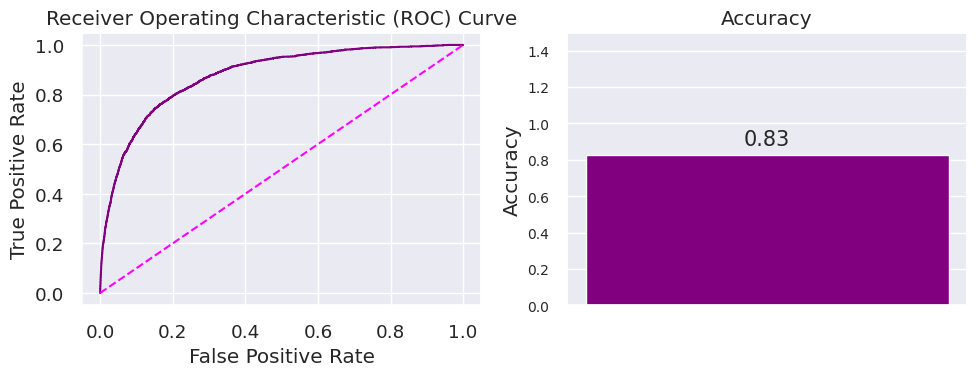

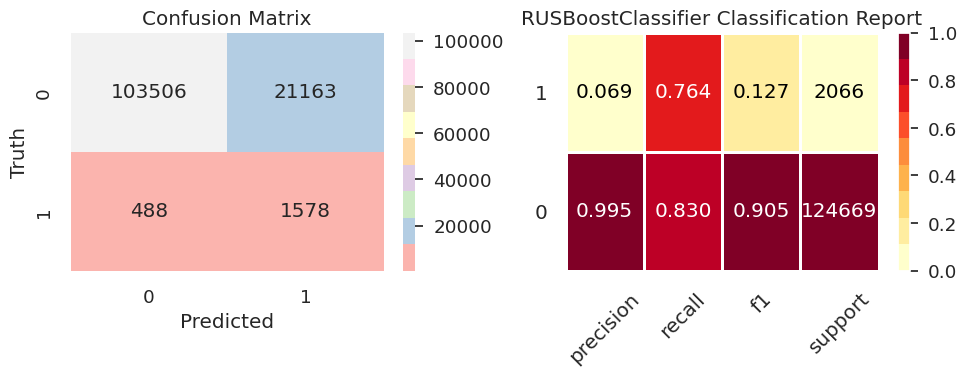

CPU times: user 1min 41s, sys: 9.1 s, total: 1min 50s
Wall time: 2min 53s


In [82]:
%%time
experiment.train(rusboost_model,param_grid=param_grid,search_type='random')

In [83]:
saved_model_path = experiment.save_model('step_3_RUSBoostClassifier.pkl')
print("Model saved at:", saved_model_path)

Model saved at: step_3_RUSBoostClassifier.pkl


## EasyEnsembleClassifier

Simialr to RUSBoostClassifier which randomly under-sample the dataset before performing a boosting iteration. A specific method which uses AdaBoostClassifier as learners is called “EasyEnsemble”.

The classifier is an ensemble of AdaBoost learners trained on different balanced bootstrap samples. The balancing is achieved by random under-sampling.

In [84]:
from imblearn.ensemble import EasyEnsembleClassifier

# empty hyperparameters grid (needed due to the way the modeling class was built)
param_grid = {
}

# bagging + boosting + under-sammpling
easyEnsemble_model = EasyEnsembleClassifier(
                    n_estimators=100, # Number of AdaBoost learners in the ensemble.
                    sampling_strategy='auto', # Sampling information to sample the data set. 'auto': equivalent to 'not minority'.
                    replacement=False, # Whether or not to sample randomly with replacement or not.
                    random_state=42,)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: EasyEnsembleClassifier(n_estimators=100, random_state=42)
Best score: 0.8887364680096738
AUC: 0.8861128586017556
TPR:  52.080000000000005% 
FPR:  4.99% 
Threshold:  0.51
Predictive Equality:  100.0%


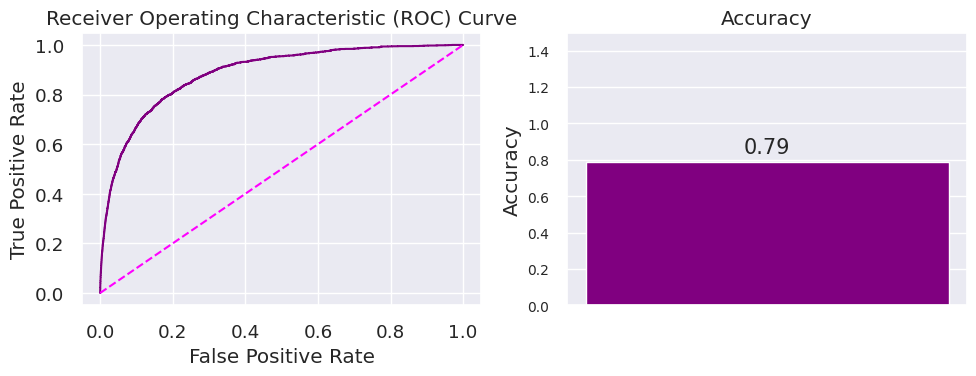

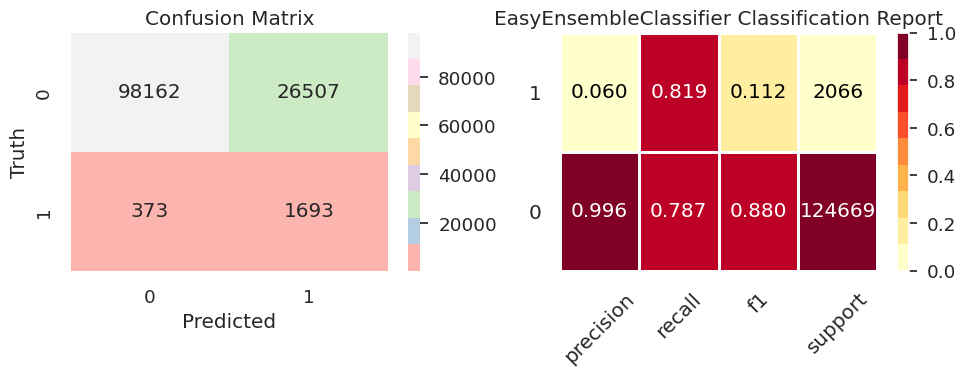

CPU times: user 20min 31s, sys: 9.8 s, total: 20min 41s
Wall time: 25min 37s


In [85]:
%%time
experiment.train(easyEnsemble_model,param_grid=param_grid,search_type='random')

In [86]:
saved_model_path = experiment.save_model('step_3_EasyEnsembleClassifier.pkl')
print("Model saved at:", saved_model_path)

Model saved at: step_3_EasyEnsembleClassifier.pkl


# 8- Conclusion

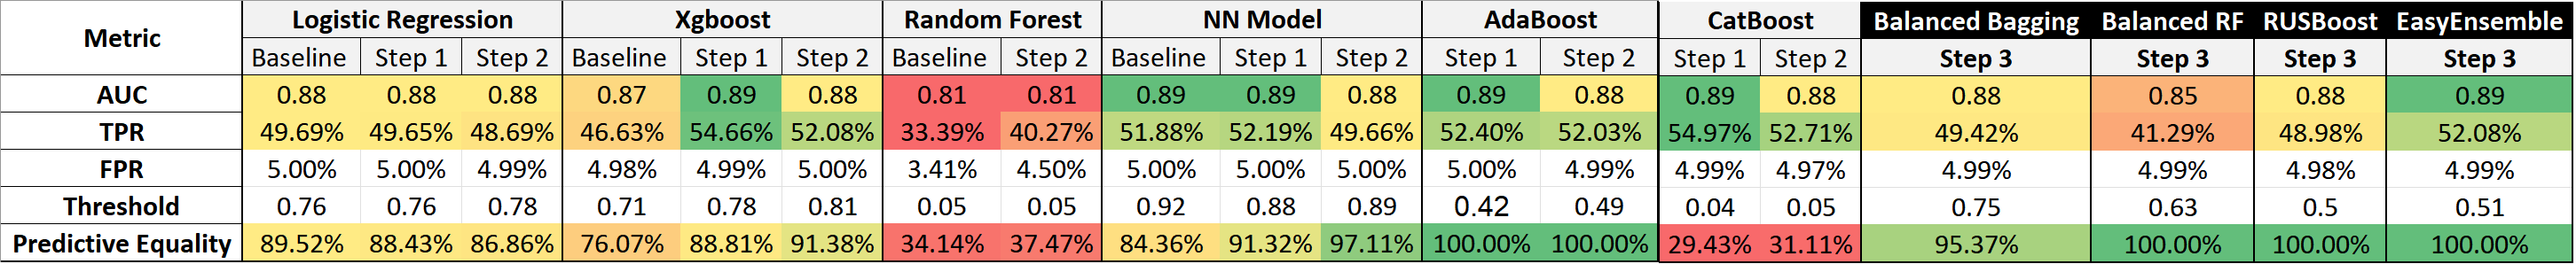

*Green: Highest*

*Red: Lowest*

Recall that the best model of Step 1 was the XGBoost and best model of Step 2 was AdaBoost.

Best model is determined by the balance between AUC, TPR and Predictive Equality (fairness)

In this trial of **Step 3** we performed the same pre-processing steps that were done during Step 2 for fair comparison. Pre-processing done is listed below:
* Nulls imputation
* Outliers deletion
* Scaling numerical features using "Standard Scaler"
* Encoding the categorical features using "One-hot-encoder"


**Thoughts on Training Results**

* During this experiment we tried multiple ensemble models that handle the class imbalance out-of-the-box without the need for manual data resampling techniques.

* BalancedBaggingClassifier
    *   Since we perfomred bagging of Logistic regression models we can compare this model performance with previously tried logistic regression models.
    *   We can notice that the AUC and TPR didn't change compared by the LR Basline and Step 1 and Step 2 models however the Predictive Equality (Fairness) has improved significantly from ~86% to ~95%.
    * so using the bagging with logistic regression has improved the LR performance as it kept the TPR and AUC without degradation and improved the fairness.


* BalancedRandomForestClassifier
    *   Since this ensemble model is just a balanced random forest which randomly under-samples each bootstrap sample to achieve balancing, we can compare its perfomance with the previous random forest models such as the Baseline, Step 1 and Step 2 models.
    * We can notice immediately that all the metrics have improved for the random forest when we performed balanced bagging where the fairness is improved tremendously from ~37% to 100%.
    * Also the TPR and AUC have been improved

* RUSBoostClassifier
    *   In RUSBoost model we used the default decision tree estimator with max depth of one so it resembles an AdaBoost model.
    * When we compare by AdaBoost we see that the fairness is preserved however the TPR has decreased while the AUC is approximately constant.


* EasyEnsembleClassifier
    *   “EasyEnsemble” is made specificaly from ensembled AdaBoost models combining the bagging and boosting and sampling.
    * So this model can be compared by AdaBoost models of Baseline, Step 1 and Step 2.
    * When we compare it by previous AdaBoost implementations we notice that the performance across all metrics is approximately constant suggesting that the base AdaBoost model is the best we can achieve using this model class as no improvement is noticed as with other models.

**Summary**
* We noticed that imblearn ensemble models can improve the performance of vanilla models/
* Imblearn ensemble models excell at improving the model fairness (Predictive Equality) as all tried models has very high PE exceeding the vanilla models results.
* Finally the best model of this trial is the "EasyEnsembleClassifier" as it had the highest AUC and TPR compared by the rest of tried ensemble models while for Predictive Equality as mentioned before all ensemble models had fairly high and comparable performance.

# 9- Tuning the Best Model

Since EasyEnsembleClassifier was the best model we will tune its hyperparameters to check if we can achieve even better performance

In [87]:
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups)

In [88]:
from imblearn.ensemble import EasyEnsembleClassifier

# empty hyperparameters grid (needed due to the way the modeling class was built)
param_grid = {
                    'n_estimators' : [50, 100], # Number of AdaBoost learners in the ensemble.
                    'sampling_strategy' : ['auto'], # Sampling information to sample the data set. 'auto': equivalent to 'not minority'.
                    'replacement': [False, True], # Whether or not to sample randomly with replacement or not.
 }

# bagging + boosting + under-sammpling
easyEnsemble_model = EasyEnsembleClassifier(random_state = 42)

Fitting 1 folds for each of 4 candidates, totalling 4 fits
Best hyperparameters: {'sampling_strategy': 'auto', 'replacement': False, 'n_estimators': 50}
Best estimator: EasyEnsembleClassifier(n_estimators=50, random_state=42)
Best score: 0.8888838257556958
AUC: 0.886213648241997
TPR:  52.18000000000001% 
FPR:  4.99% 
Threshold:  0.51
Predictive Equality:  100.0%


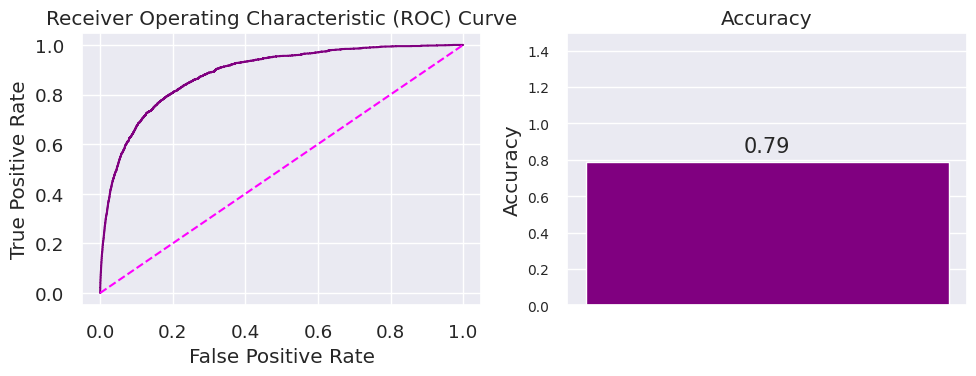

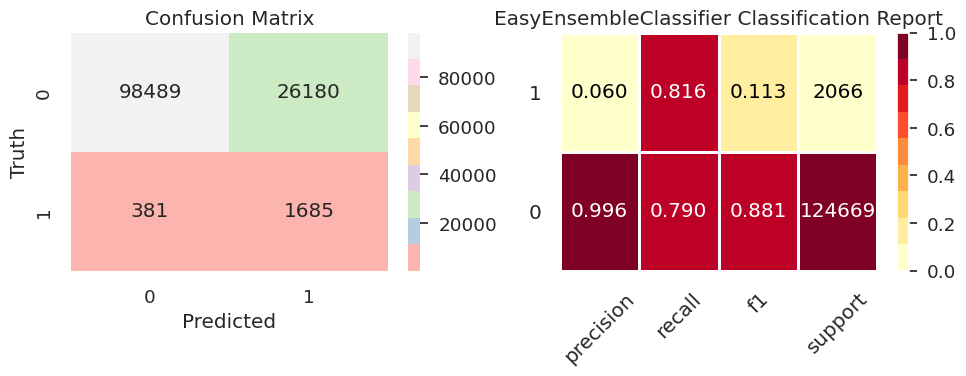

CPU times: user 10min 28s, sys: 6 s, total: 10min 34s
Wall time: 22min 38s


In [89]:
%%time
experiment.train(easyEnsemble_model,param_grid=param_grid,search_type='random')

In [90]:
saved_model_path = experiment.save_model('step_3_EasyEnsembleClassifier_tuning.pkl')
print("Model saved at:", saved_model_path)

Model saved at: step_3_EasyEnsembleClassifier_tuning.pkl


By comparing the result of the hyperparameters tuning with the previous EasyEnsembleClassifier there is no significant enhancement from the previously obtained model and the metrics are constant so the previous model was the best within the parameters searching range.